# Problem Statement
The primary goal is to:
1. Analyze the dataset to understand trends in medal distribution.
2. Identify the top-performing countries and athletes.
3. Study the gender distribution of events and medals.
4. Visualize the data using Python.

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Summer_Olympic_medals_1976_to_2008.csv', encoding='latin1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [ ]:
# Standardize categorical values
df['Gender'] = df['Gender'].replace('Men', 'M')
df['Gender'] = df['Gender'].replace('Women', 'F')

In [ ]:
# Check consistency between related columns

df['compare_gender'] = df['Gender'] == df['Event_gender']
df['compare_gender'].value_counts()
# Therefore we need to keep both columns 'Gender' and 'Event_gender'

,count
compare_gender,
True,8817
False,6616


In [ ]:
# Dropping unnecessary columns
df.drop('compare_gender', axis=1, inplace=True)


# Data Cleaning

In [ ]:
# Handling null values

print('Before handling null values')
print(df.isnull().sum())

df.dropna(inplace=True)

print('\nAfter handling null values')
print(df.isnull().sum())

Before handling null values
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

After handling null values
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [ ]:
# Handling type of columns
df['Year'] = df['Year'].astype(int)
df['Country_Code'] = df['Country_Code'].astype(str)

In [ ]:
# Handling duplicated values
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)

False    15315
True         1
Name: count, dtype: int64


In [ ]:
# Normalize text values
df['Athlete']       = df['Athlete'].str.strip().str.title()
df['Country']       = df['Country'].str.strip().str.title()
df['Country_Code']  = df['Country_Code'].str.strip().str.title()
df['Medal']         = df['Medal'].str.strip().str.title()
df['Event']         = df['Event'].str.strip().str.title()
df['Sport']         = df['Sport'].str.strip().str.title()
df['City']          = df['City'].str.strip().str.title()
df['Discipline']    = df['Discipline'].str.strip().str.title()

# Exploratory Data Analysis (EDA)

In [ ]:
# Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.shape

(15315, 11)

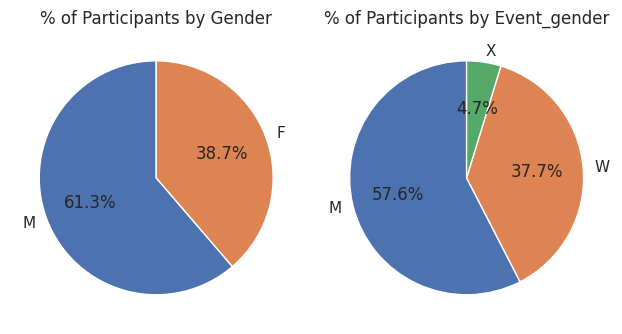

In [ ]:
# Participants

# Gender
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('% of Participants by Gender')
plt.ylabel('')

# Event_gender
plt.subplot(1,2,2)
gender_counts = df['Event_gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('% of Participants by Event_gender')
plt.ylabel('')

plt.tight_layout()
plt.show()

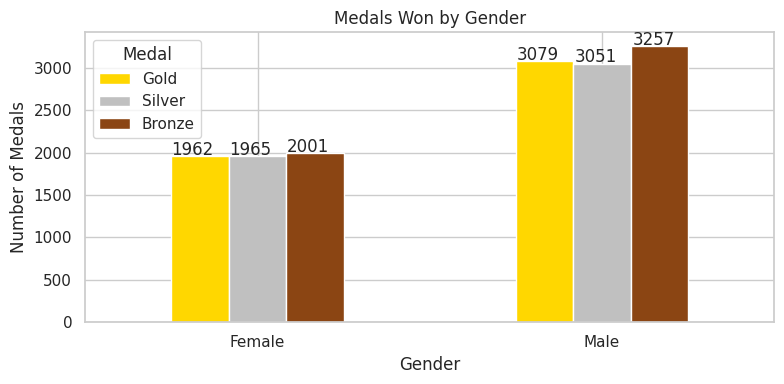

In [ ]:
# Medals Won by Gender

medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'saddlebrown'}
crosstab_df = pd.crosstab(df['Gender'], df['Medal'])
crosstab_df = crosstab_df[['Gold', 'Silver', 'Bronze']]
ax = crosstab_df.plot(
    kind='bar',
    color=[medal_colors[col] for col in crosstab_df.columns],
    figsize=(8, 4)
)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))



plt.title('Medals Won by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.show()

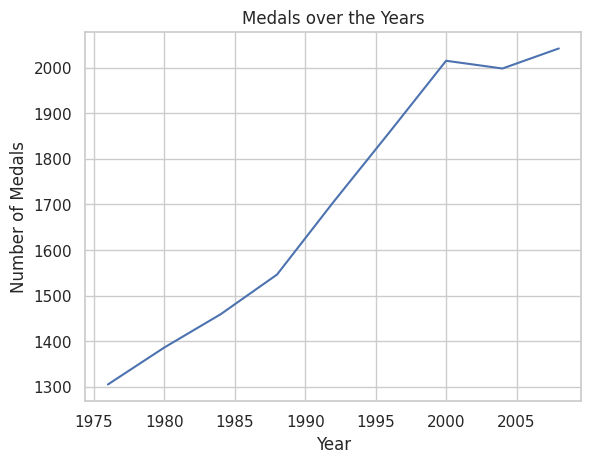

In [ ]:
# Medals over the years
df.groupby('Year')['Medal'].count().plot(kind='line')
plt.title('Medals over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

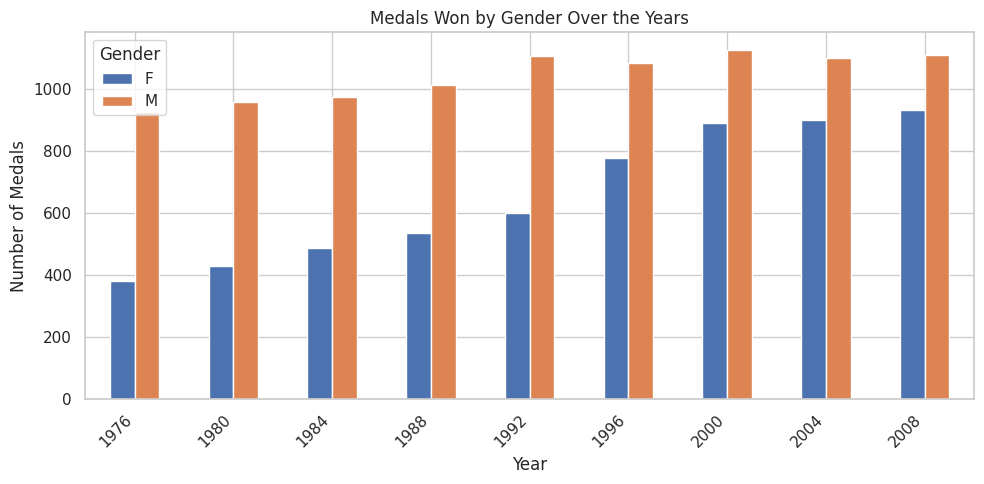

In [ ]:
# Total medals by Gender across years
pd.crosstab(df['Year'], df['Gender']).plot(kind='bar', figsize=(10, 5))

plt.title('Medals Won by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

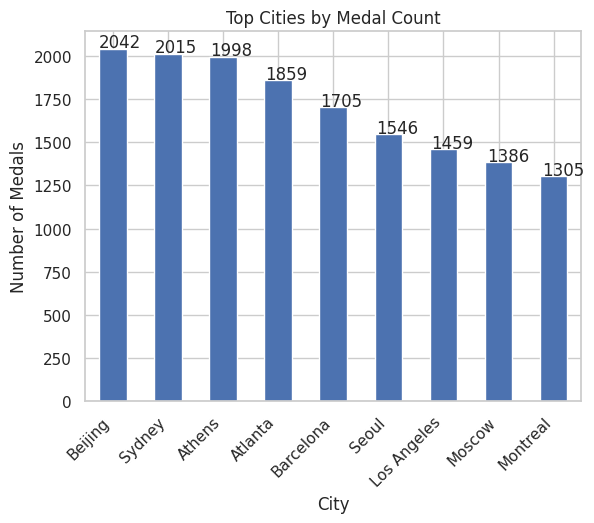

In [ ]:
# City vs Medal count
medal_counts = df.groupby('City')['Medal'].count().sort_values(ascending=False)
ax = medal_counts.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Top Cities by Medal Count')
plt.xlabel('City')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

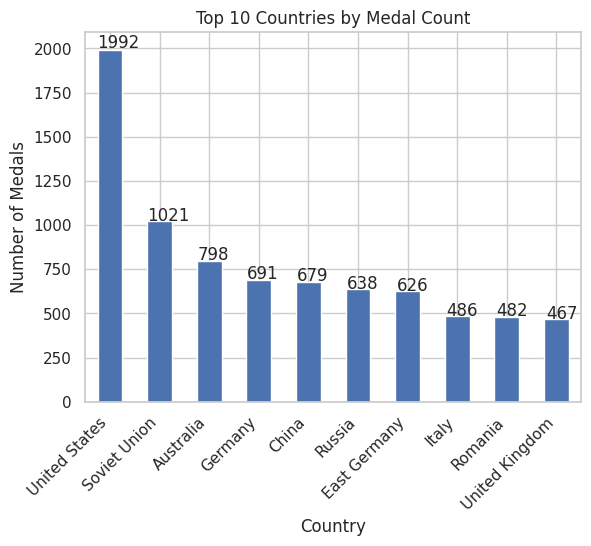

In [ ]:
# Country vs Medal count
medal_counts = df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)
ax = medal_counts.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

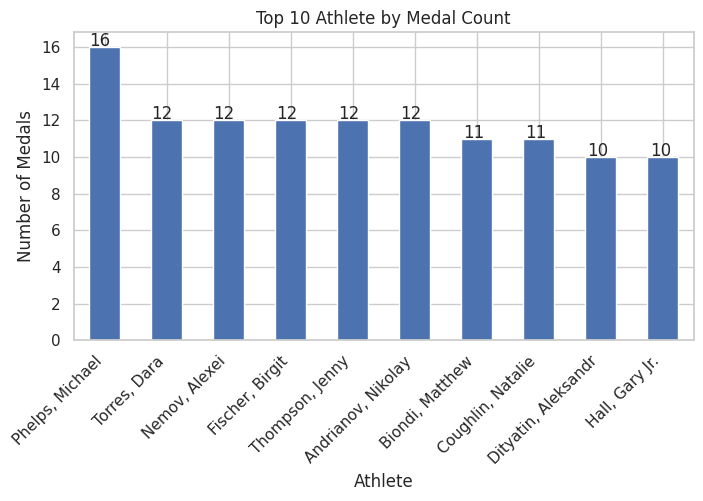

In [ ]:
# Athlete vs Medal count

medal_counts = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)
ax = medal_counts.plot(kind='bar', figsize=(8, 4))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Top 10 Athlete by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

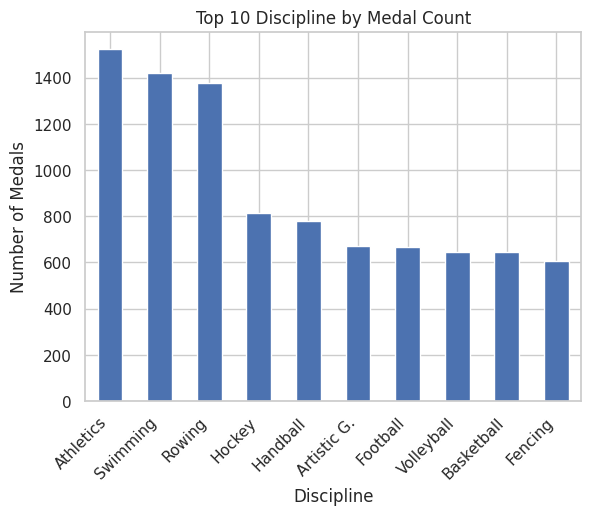

In [ ]:
# Discipline vs Medal count
medal_counts = df.groupby('Discipline')['Medal'].count().sort_values(ascending=False).head(10)

medal_counts.plot(kind='bar')

plt.title('Top 10 Discipline by Medal Count')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

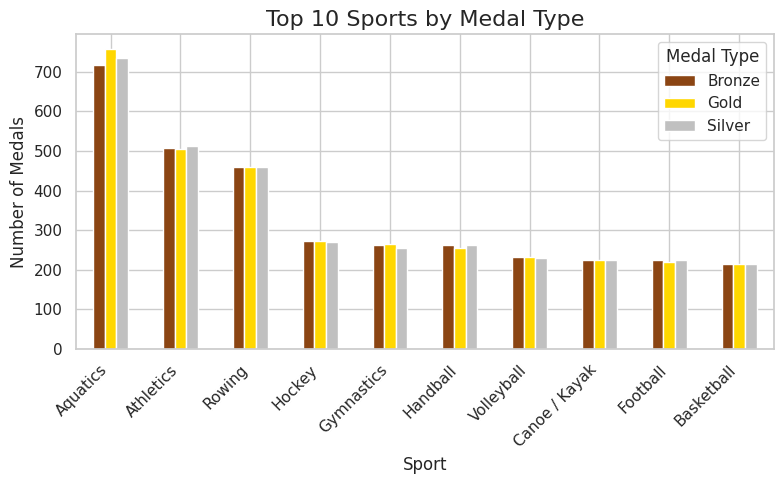

In [ ]:
# top 10 Sport by medals

medal_counts = df.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)
top_10_sports = medal_counts.sum(axis=1).nlargest(10).index
top_10_medal_counts = medal_counts.loc[top_10_sports]
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'saddlebrown'}
top_10_medal_counts.plot(kind='bar', color=[medal_colors[m] for m in top_10_medal_counts.columns], figsize=(8, 5))



plt.title('Top 10 Sports by Medal Type', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medal Type')

plt.tight_layout()
plt.show()

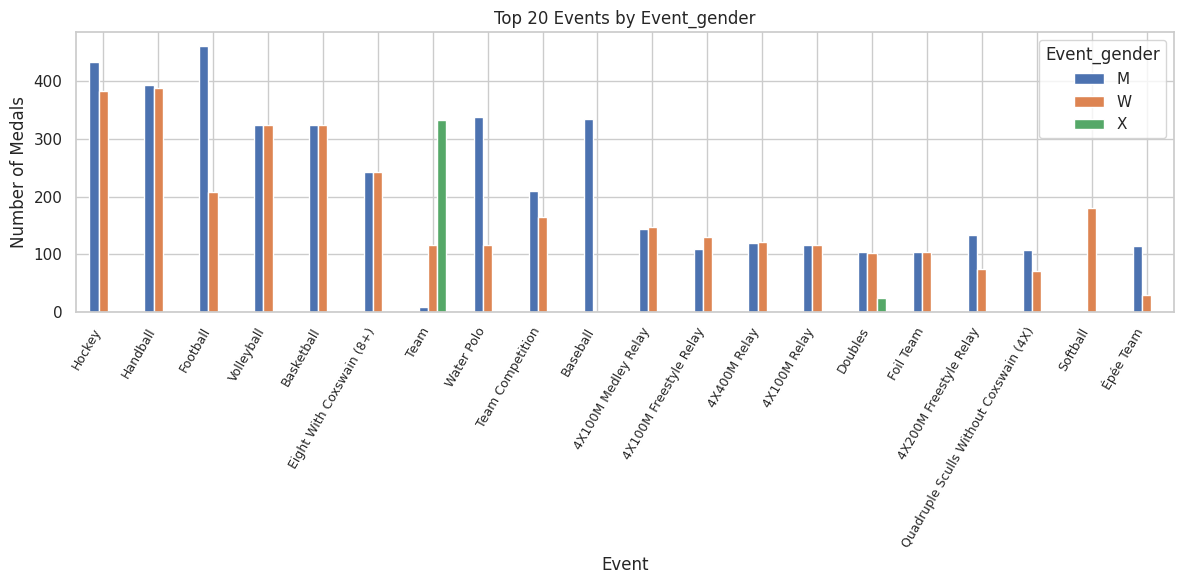

In [ ]:
# Crosstab of top 20 events by Event_gender
top_20_event = df['Event'].value_counts().head(20).index
df_top_20 = df[df['Event'].isin(top_20_event)]

crosstab_df = pd.crosstab(df_top_20['Event'], df_top_20['Event_gender'])

# Sort by total medals
sorted_crosstab_df = crosstab_df.loc[crosstab_df.sum(axis=1).sort_values(ascending=False).index]

# Plot
sorted_crosstab_df.plot(kind='bar', figsize=(12, 6))

plt.title('Top 20 Events by Event_gender')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.legend(title='Event_gender')
plt.xticks(rotation=60, ha='right', fontsize=9)

plt.tight_layout()
plt.show()

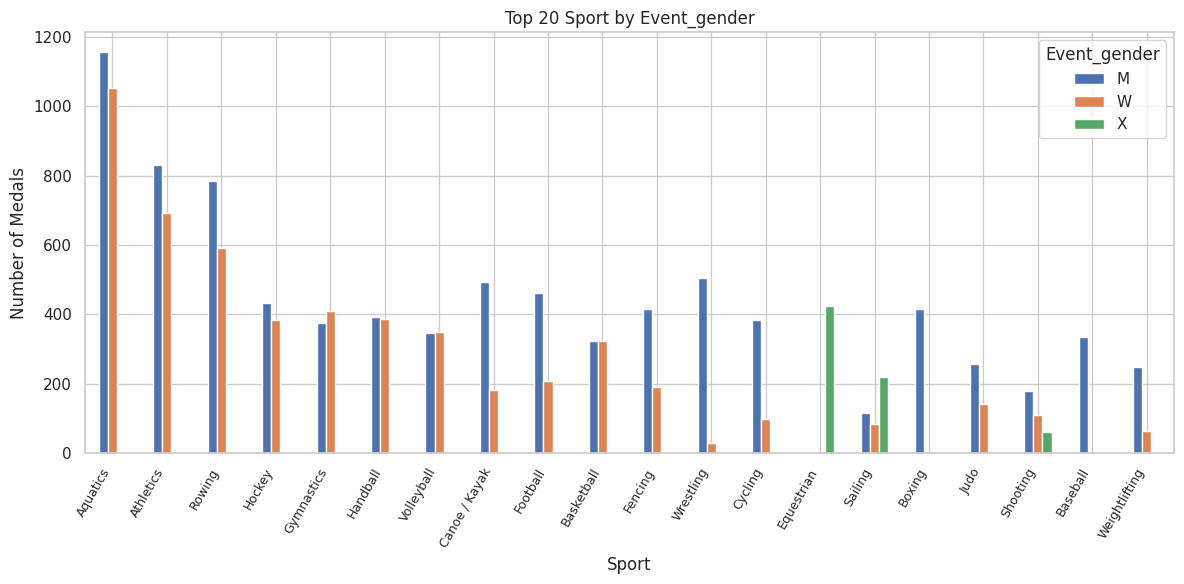

In [ ]:
# Crosstab of top 20 Sport by Event_gender
top_20_event = df['Sport'].value_counts().head(20).index
df_top_20 = df[df['Sport'].isin(top_20_event)]

crosstab_df = pd.crosstab(df_top_20['Sport'], df_top_20['Event_gender'])

# Sort by total medals
sorted_crosstab_df = crosstab_df.loc[crosstab_df.sum(axis=1).sort_values(ascending=False).index]

# Plot
sorted_crosstab_df.plot(kind='bar', figsize=(12, 6))

plt.title('Top 20 Sport by Event_gender')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.legend(title='Event_gender')
plt.xticks(rotation=60, ha='right', fontsize=9)

plt.tight_layout()
plt.show()

# Questions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Which city hosted maximum number of olympics

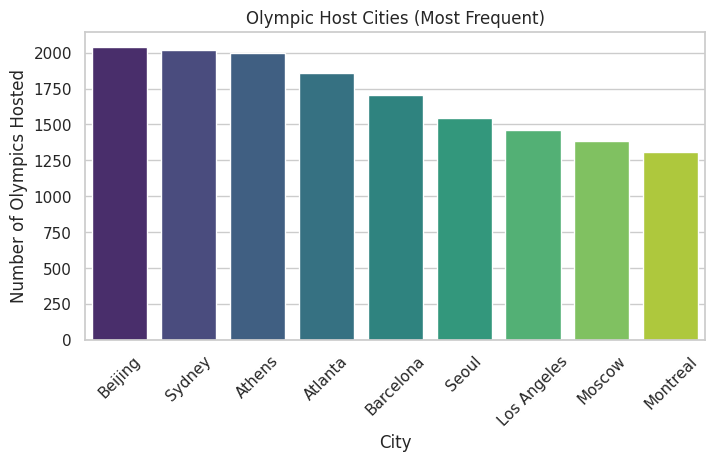

In [ ]:
# Count number of Olympics hosted by each city
city_counts = df['City'].value_counts()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Olympics Hosted")
plt.title("Olympic Host Cities (Most Frequent)")
plt.show()


## Q2. Which city hosted most events.

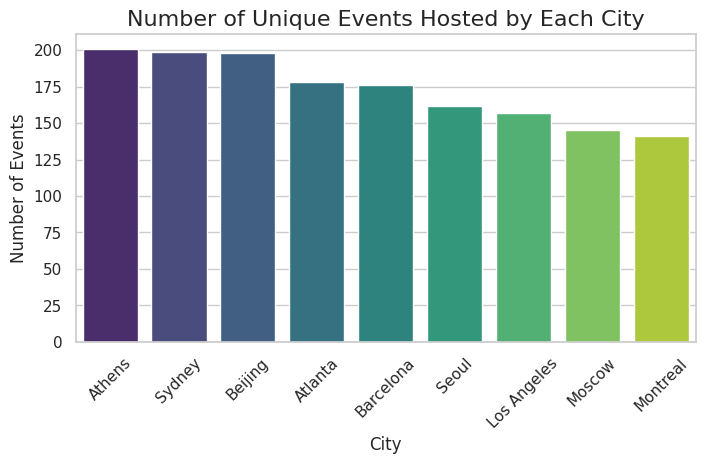

In [ ]:
# Count events per city
city_events = df.groupby('City')['Event'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=city_events.index, y=city_events.values, palette="viridis")

plt.title("Number of Unique Events Hosted by Each City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Q3. Understand the events themselves.

In [ ]:
# Set style
sns.set(style="whitegrid")

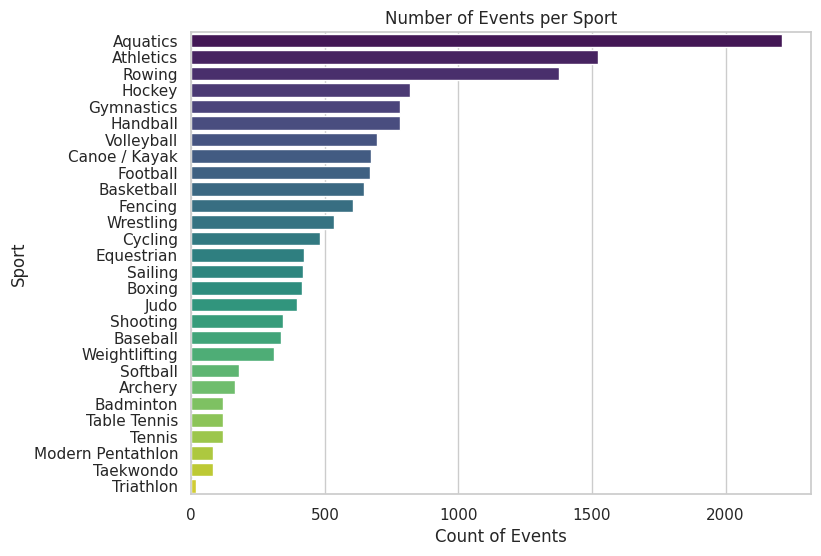

In [ ]:
# 1. Number of Events per Sport

plt.figure(figsize=(8,6))
sns.countplot(y=df['Sport'], order=df['Sport'].value_counts().index, palette="viridis")
plt.title("Number of Events per Sport")
plt.xlabel("Count of Events")
plt.ylabel("Sport")
plt.show()

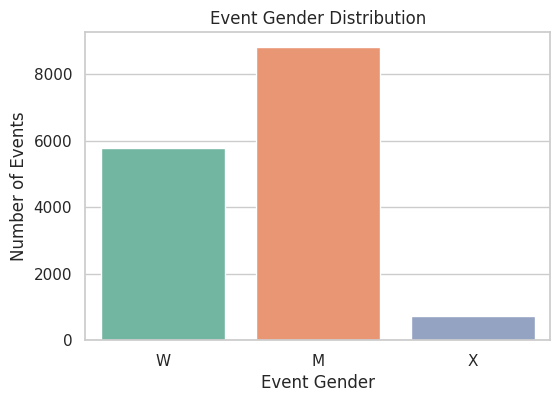

In [ ]:
# 2. Event Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Event_gender', data=df, palette="Set2")
plt.title("Event Gender Distribution")
plt.xlabel("Event Gender")
plt.ylabel("Number of Events")
plt.show()

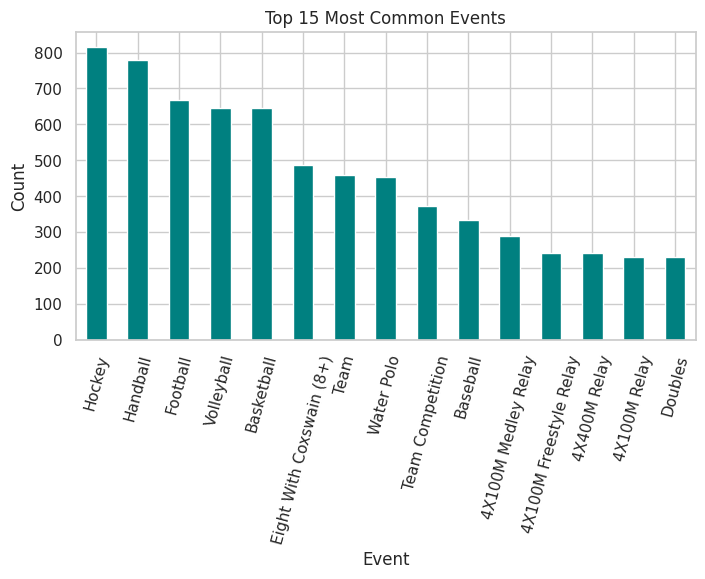

In [ ]:
# 3. Top 15 Most Common Events
plt.figure(figsize=(8,4))
df['Event'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Most Common Events")
plt.xlabel("Event")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

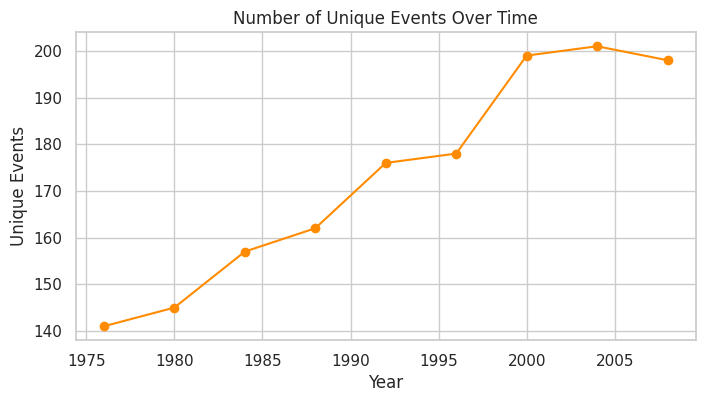

In [ ]:
# 4. Events Over Time

events_per_year = df.groupby('Year')['Event'].nunique()

plt.figure(figsize=(8,4))
events_per_year.plot(kind='line', marker='o', color="darkorange")
plt.title("Number of Unique Events Over Time")
plt.xlabel("Year")
plt.ylabel("Unique Events")
plt.grid(True)
plt.show()

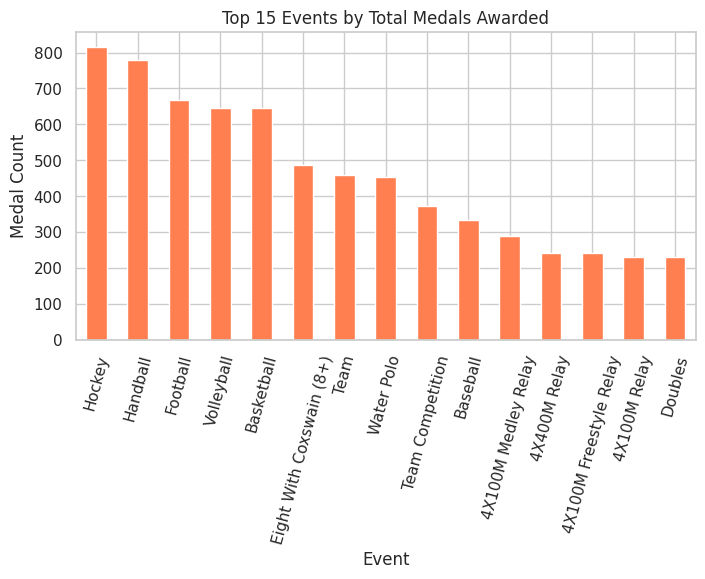

In [ ]:
# 5. Medals per Event
plt.figure(figsize=(8,4))
df.groupby('Event')['Medal'].count().sort_values(ascending=False).head(15).plot(kind='bar', color='coral')
plt.title("Top 15 Events by Total Medals Awarded")
plt.xlabel("Event")
plt.ylabel("Medal Count")
plt.xticks(rotation=75)
plt.show()

## Q4. Which Athlete has win most medal from given period?

In [ ]:
# Count medals per athlete
athlete_medals = df.groupby('Athlete')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

# Display top 10 athletes
top_athletes = athlete_medals.head()
print(top_athletes)

                  Athlete  Medal
7752      PHELPS, Michael     16
2776      FISCHER, Birgit     12
249    ANDRIANOV, Nikolay     12
10019        TORRES, Dara     12
9884      THOMPSON, Jenny     12


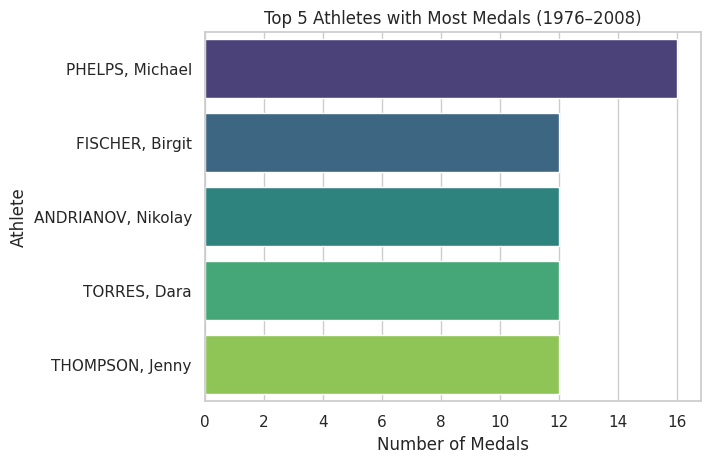

In [ ]:
sns.barplot(data=top_athletes, x='Medal', y='Athlete', palette='viridis')

plt.title("Top 5 Athletes with Most Medals (1976–2008)")
plt.xlabel("Number of Medals")
plt.ylabel("Athlete")
plt.show()


## Q5. Put some light on gender ratio in winning teams?

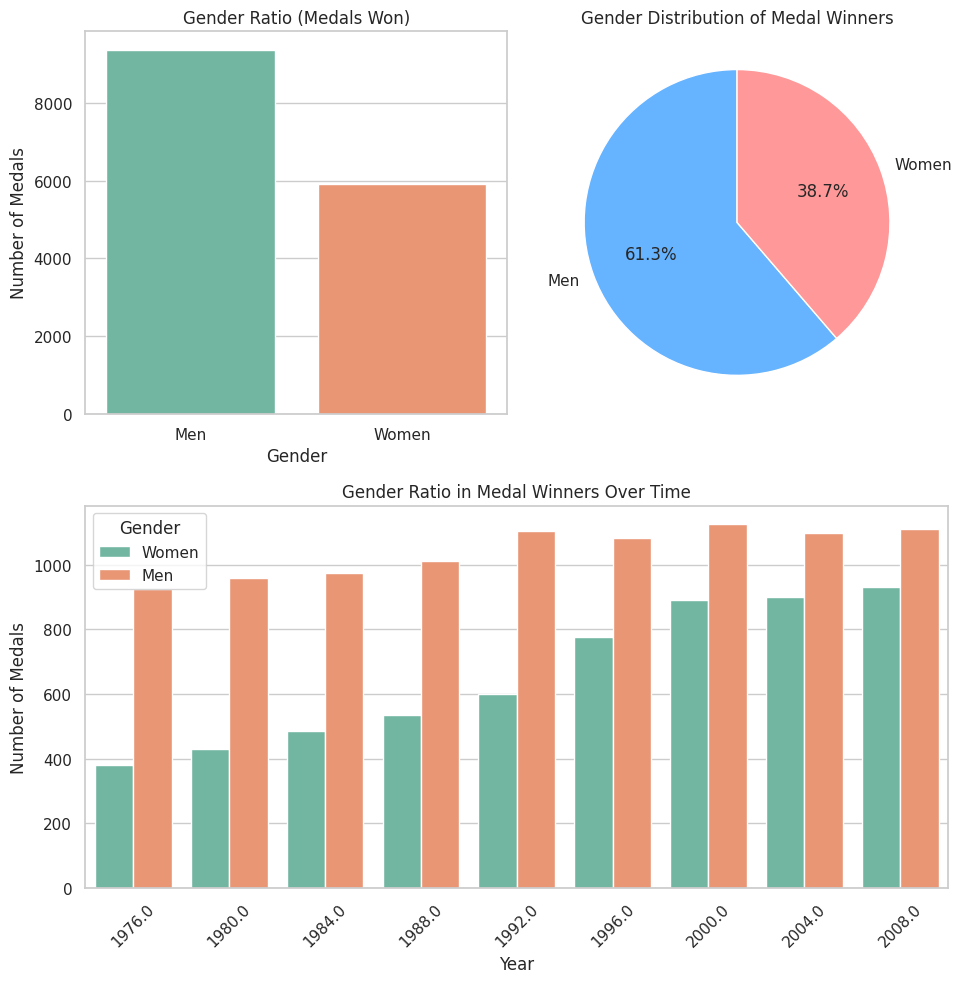

In [ ]:
gender_counts = df['Gender'].value_counts()

fig = plt.figure(figsize=(10,10))

# Plot 1: Bar chart for Gender Ratio
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2", ax=ax1)
ax1.set_title("Gender Ratio (Medals Won)")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Number of Medals")

# Plot 2: Pie chart for Gender Distribution
ax2 = plt.subplot2grid((2, 2), (0, 1))
gender_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax2.set_title("Gender Distribution of Medal Winners")
ax2.set_ylabel('')

# Plot 3: Count plot for Gender Ratio over Time
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
sns.countplot(data=df, x='Year', hue='Gender', palette="Set2", ax=ax3)
ax3.set_title("Gender Ratio in Medal Winners Over Time")
ax3.set_ylabel("Number of Medals")
ax3.set_xlabel("Year")
ax3.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Q6. Which country has win most medal and how many in each year?

In [ ]:
# Total medals by country (overall)
country_medals = df.groupby('Country')['Medal'].count().reset_index()
country_medals = country_medals.sort_values(by='Medal', ascending=False)

# Find the top country
top_country = country_medals.iloc[0]['Country']
print("Top country:", top_country)

# Medals per year for that country
country_year_medals = df[df['Country'] == top_country].groupby('Year')['Medal'].count().reset_index()


Top country: United States


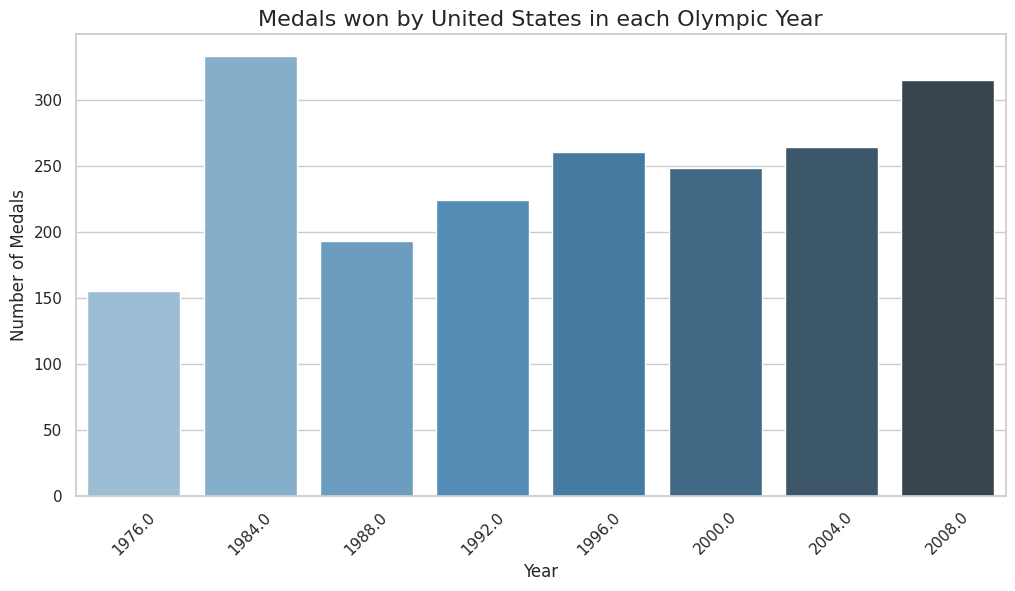

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Medal', data=country_year_medals, palette="Blues_d")

plt.title(f"Medals won by {top_country} in each Olympic Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.show()


## Q7. Can you tell me which country has dominated any particular sport?

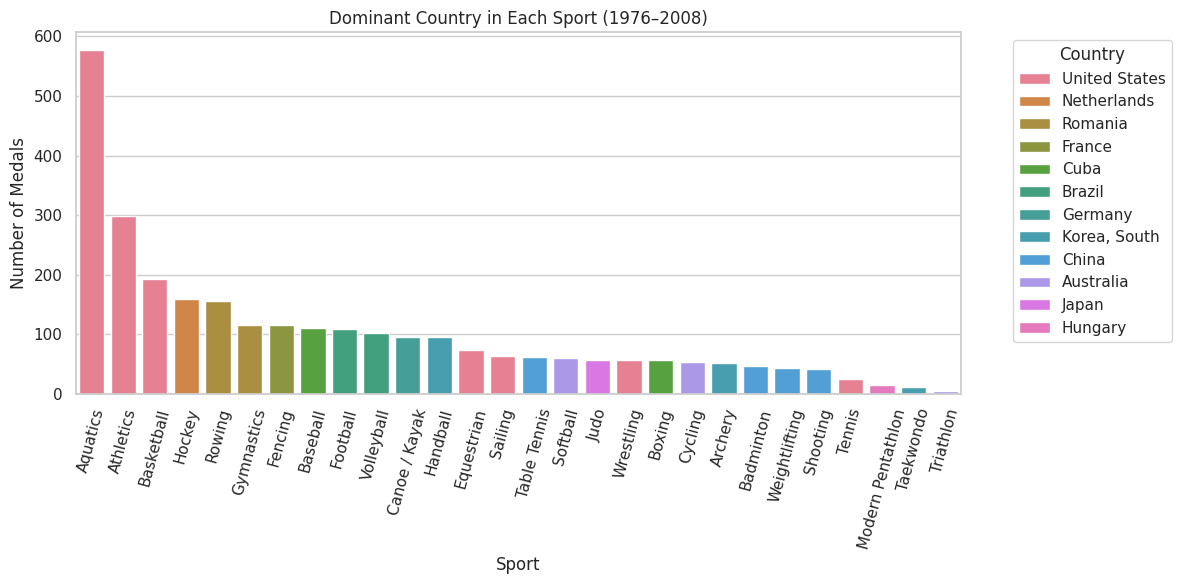

In [ ]:
# 1. Group by Country & Sport => count medals
sport_country = df.groupby(['Sport', 'Country'])['Medal'].count().reset_index()

# 2. For each Sport, get the country with max medals
dominance = sport_country.loc[sport_country.groupby('Sport')['Medal'].idxmax()]

# 3. Sort by medal count
dominance = dominance.sort_values(by='Medal', ascending=False)

# 4. Plot
plt.figure(figsize=(12,6))
sns.barplot(data=dominance, x='Sport', y='Medal', hue='Country', dodge=False)
plt.xticks(rotation=75)
plt.title("Dominant Country in Each Sport (1976–2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Sport")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Q8. Has any athlete changed his or her Event or Discipline or sport and still win the medal?

In [ ]:
# Group medals by athlete across Sport, Discipline, Event
athlete_groups = df.groupby('Athlete').agg({
    'Sport': pd.Series.nunique,
    'Discipline': pd.Series.nunique,
    'Event': pd.Series.nunique,
    'Medal': 'count'
}).reset_index()

# Keep only athletes who changed something
multi_category = athlete_groups[
    (athlete_groups['Sport'] > 1) |
    (athlete_groups['Discipline'] > 1) |
    (athlete_groups['Event'] > 1)
]

print("Number of athletes who changed:", multi_category.shape[0])
print(multi_category.head())


Number of athletes who changed: 1215
                Athlete  Sport  Discipline  Event  Medal
16  ABBAGNALE, Agostino      1           1      2      3
26    ABDULLAYEV, Namig      1           1      2      2
33   ABEYLEGESSE, Elvan      1           1      2      2
35      ABRAHAM, Attila      1           1      2      3
56          ADAMS, Neil      1           1      2      2


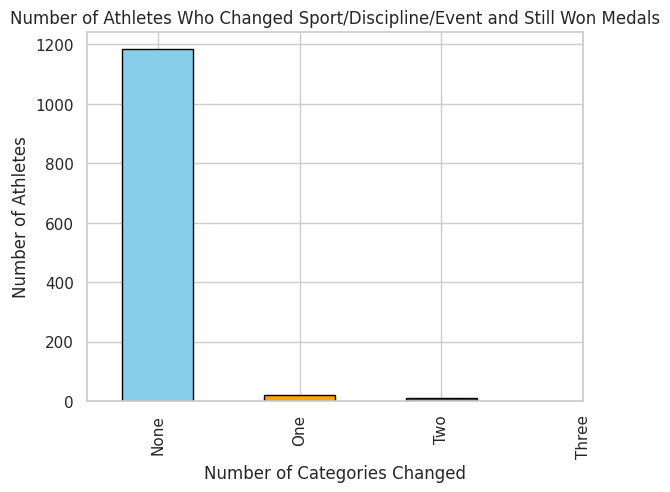

In [ ]:
multi_category['changes'] = (
    (multi_category['Sport'] > 1).astype(int) +
    (multi_category['Discipline'] > 1).astype(int) +
    (multi_category['Event'] > 1).astype(int)
)

multi_category['changes'].value_counts().plot(
    kind='bar', color=['skyblue','orange','green'], edgecolor='black'
)

plt.title("Number of Athletes Who Changed Sport/Discipline/Event and Still Won Medals")
plt.xlabel("Number of Categories Changed")
plt.ylabel("Number of Athletes")
plt.xticks(ticks=[0,1,2,3], labels=["None","One","Two","Three"])
plt.show()

## Q9. Which country has win most medal and how many in each year? Elaborate the result and dive into detials.(Pick any 5 country for this)

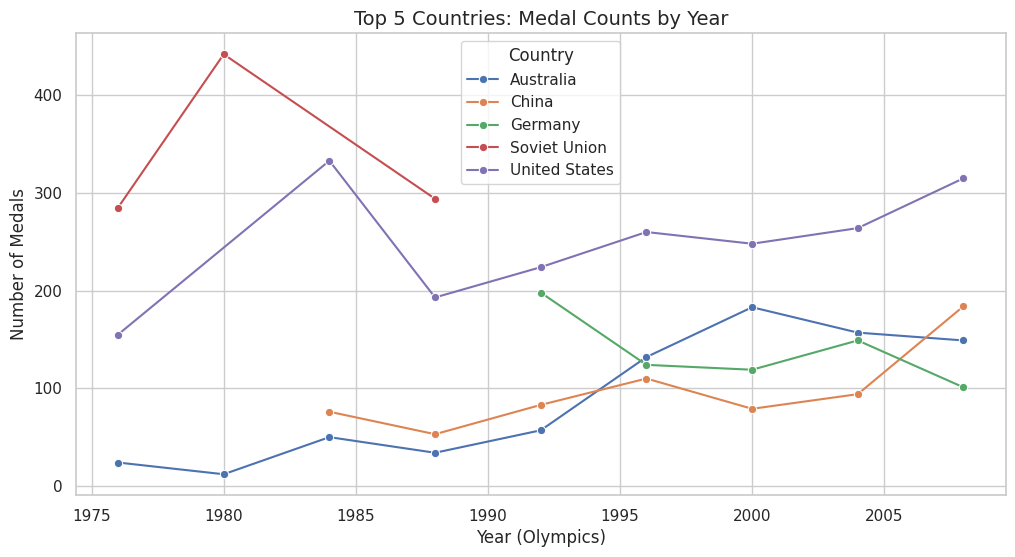

In [ ]:
# Step 1: Count medals per country per year
country_year_medals = df.groupby(['Country', 'Year'])['Medal'].count().reset_index()

# Step 2: Find top 5 countries overall
top5_countries = df['Country'].value_counts().head(5).index

# Filter only top 5
top5_data = country_year_medals[country_year_medals['Country'].isin(top5_countries)]

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=top5_data, x='Year', y='Medal', hue='Country', marker="o")

plt.title("Top 5 Countries: Medal Counts by Year", fontsize=14)
plt.xlabel("Year (Olympics)")
plt.ylabel("Number of Medals")
plt.legend(title="Country")
plt.grid(True)
plt.show()


# Predictive Analysis

In [ ]:
# Import Required Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Encode categorical variables

le = LabelEncoder()
df['Sport'] = le.fit_transform(df['Sport'])
df['Discipline'] = le.fit_transform(df['Discipline'])
df['Event'] = le.fit_transform(df['Event'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Event_gender'] = le.fit_transform(df['Event_gender'])
df['Country'] = le.fit_transform(df['Country'])
df['Medal'] = le.fit_transform(df['Medal'])


Feature Engineering

In [ ]:
# 1. Country-Level/City-Level Features
# Total medals won by a country (historical strength)
df['Country_Total_Medals'] = df.groupby('Country')['Medal'].transform('count')

# Medals won by a country in that year (form in that Olympics)
df['Country_Year_Medals'] = df.groupby(['Country','Year'])['Medal'].transform('count')

# Medals won by a country in that year (form in that Olympics)
df['City_Year_Medals'] = df.groupby(['City','Year'])['Medal'].transform('count')



# 2. Sport/Discipline-Level Features
# Popularity of a sport (number of events in that sport)
df['Sport_Event_Count'] = df.groupby('Sport')['Event'].transform('count')

# Medals per sport per year (competition intensity in that Olympics)
df['Sport_Year_Medals'] = df.groupby(['Sport','Year'])['Medal'].transform('count')



# 3. Athlete-Level Features
# Total medals an athlete has already won (experience indicator)
df['Athlete_Total_Medals'] = df.groupby('Athlete')['Medal'].transform('count')

# How many events an athlete has participated in
df['Athlete_Event_Count'] = df.groupby('Athlete')['Event'].transform('count')



# 4. Gender-Based Features
# Country’s medals split by gender (strength of men/women teams)
df['Country_Gender_Medals'] = df.groupby(['Country','Gender'])['Medal'].transform('count')

# Sport medals split by event gender
df['Sport_Gender_Medals'] = df.groupby(['Sport','Event_gender'])['Medal'].transform('count')



# 5. Event-Level Features
# Total medals awarded in that event historically (prestige)
df['Event_Total_Medals'] = df.groupby('Event')['Medal'].transform('count')

# Event popularity in that year (how competitive that event was)
df['Event_Year_Medals'] = df.groupby(['Event','Year'])['Medal'].transform('count')



# 6. Temporal Features
# Olympic edition number (instead of raw year)
df['Olympic_Edition'] = df['Year'].rank(method='dense').astype(int)

# Years since a country first participated
first_year = df.groupby('Country')['Year'].transform('min')
df['Years_Since_First'] = df['Year'] - first_year


Splitting and Training Dataset

In [ ]:
# Define features (X) and target (y)
X = df.drop(['Medal', 'Athlete', 'City', 'Country_Code'], axis=1)
y = df['Medal']

In [ ]:
scaler = StandardScaler()
X['Year'] = scaler.fit_transform(X[['Year']])

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


Training shape: (12252, 20) (12252,)
Testing shape: (3063, 20) (3063,)


## Choose a Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="lbfgs", multi_class="auto"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
     "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.4101
              precision    recall  f1-score   support

           0       0.40      0.55      0.47      1052
           1       0.45      0.48      0.46      1008
           2       0.35      0.19      0.25      1003

    accuracy                           0.41      3063
   macro avg       0.40      0.41      0.39      3063
weighted avg       0.40      0.41      0.39      3063


Decision Tree
Accuracy: 0.7107
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1052
           1       0.72      0.72      0.72      1008
           2       0.70      0.70      0.70      1003

    accuracy                           0.71      3063
   macro avg       0.71      0.71      0.71      3063
weighted avg       0.71      0.71      0.71      3063


Random Forest
Accuracy: 0.7349
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1052
           1       0.76    

In [ ]:
print("\nModel Comparison: \n")
for model, acc in results.items():
    print(f"{model} : {round(acc, 4)}")


Model Comparison: 

Logistic Regression : 0.4101
Decision Tree : 0.7107
Random Forest : 0.7349
XGBoost : 0.7173
LightGBM : 0.6934


# Conclusion and Insights

● Top Performing Country is : United States

● Top Athletes: We identified athletes who won the most medals are :

1. Nemov, Alexei (12 medals)

2. Andrianov, Nikolay (12 medals)

3. Diabatin, Aleksandr (11 medals)

● Gender Participation:

1. Male : 64%

2. Female : 36%

● Trend of Medals Over Years:

We visualized the trend of medal wins over the
years, that shows the increasing graph and a significant increase, peaking at over 2000 medals in 2000.

● Predictive Analysis:

Random forest preforms best with 73.49% accuracy.